# Análisis exploratorio de datos

Se realiza un análisis exploratorio de los datos, con la finalidad de encontrar patrones que permitan generar información para la toma de decisiones en relación a disminuir las víctimas fatales.<br>
Para una lectura mas ordenada, los códigos de gráficos y otros datos se colocaron en funciones dentro de la librería `functions` que se adjunta en este repositorio.

In [71]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import functions
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Traemos la pestaña Hechos del Excel de Homicidios <br>
<br>
Se extraen los datos de la pestaña Hechos que se encuentra en el Excel de homicidios y se observan las primeras filas con .head()

Para que podamos leer archivos .xlsx con pandas, debemos tener instaladas las librerías: <br>
- xlrd <br>
- openpyxl <br>

Más allá de que por defecto, pandas trae incorporada la función read_excel, si no tenemos esas dos librerías nos daría error al intentar ejecutar

In [33]:
df_hechos= pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')

df_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


## Datos generales: <br>
<br>
El conjunto de datos contiene 21 columnas y 696 registros 

In [9]:
#Columnas del dataset

df_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [10]:
#Registros totales del dataset

df_hechos.shape[0]

696

Ya que algunas columnas estan escritas en mayuscula y otras en minúscula, se estandarizan los nombres.

In [34]:
# Se coloca la primera en mayúscula
df_hechos.columns = [x.capitalize() for x in df_hechos.columns]
# Se reemplazan los guiones por espacios
df_hechos.columns = df_hechos.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_hechos = df_hechos.rename(columns={'N victimas': 'Cantidad víctimas',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Hh':'Hora entera',
                                                      'Xy (caba)':'XY (CABA)',
                                                      'Victima': 'Víctima'})
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Altura',
       'Cruce', 'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x',
       'Pos y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

## Datos nulos

En cuanto a los valores faltantes, hay 747 valores nulos, que representan el 5.1% de todos los datos y se ubican en las columnas 'Altura', 'Cruce', 'Calle' y 'Dirección normalizada'.<br>
<br>
En la columna **'Altura'** faltan el 81.5% de los datos, debido a que este dato se completa cuando el hecho ocurre en algún punto de la calle (altura de la calle) y la mayoría de los hechos registrados ocurrieron en esquinas. Por este motivo, se considera que no es un dato relevante para el análsis y se decide eliminarlo del conjunto. Adicionalmente, este dato se encuentra en la columna 'Lugar del hecho' y 'Dirección normalizada'.

In [17]:
print(df_hechos.isnull().sum())

Id                         0
Cantidad víctimas          0
Fecha                      0
Año                        0
Mes                        0
Día                        0
Hora                       0
Hora entera                0
Lugar del hecho            0
Tipo de calle              0
Calle                      1
Altura                   567
Cruce                    171
Dirección normalizada      8
Comuna                     0
XY (CABA)                  0
Pos x                      0
Pos y                      0
Participantes              0
Víctima                    0
Acusado                    0
dtype: int64


In [35]:
# Se elimina la columna
df_hechos =df_hechos.drop('Altura', axis=1)
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x', 'Pos y',
       'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

En cuanto a la colomna **'Cruce'** es una variable categórica, de tipo string, que contiene 317 valones distintos y donde hay un 24,6% de valores faltantes. Al contrario de la variable anterior, esta variable no tiene dato cuando se trata de un hecho ocurrido en un cruce. Esta columna puede ser interesante para evaluar si los hechos ocurren en esquinas o en algún punto de la cuadra. A continuación, se observa la columna 'Cruce' en relación a 'Lugar del hecho' y 'Tipo de calle'.

In [19]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
df_hechos[df_hechos['Cruce'].isnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:15]

,Cruce,Lugar del hecho,Tipo de calle
2,NaN,AV ENTRE RIOS 2034,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA
14,NaN,SUIPACHA 156,CALLE
33,NaN,LIMA 1483,CALLE
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
42,NaN,AV LUIS MARIA CAMPOS 30,AVENIDA
43,NaN,LIMA 1471,CALLE
50,NaN,MAGARIÑOS CERVANTES 3900,CALLE
59,NaN,AV LA PLATA 2384,AVENIDA


In [20]:
# Se ven los valores NO nulos de cruce en relación con 'lugar del hecho' y 'Tipo de calle'
df_hechos[df_hechos['Cruce'].notnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:15]

,Cruce,Lugar del hecho,Tipo de calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,"GONZALEZ, JOAQUIN V.",NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,DE LOS CORRALES AV.,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,"IRIGOYEN, BERNARDO DE",AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
10,VERA,AV SCALABRINI ORTIZ Y VERA,AVENIDA
11,"QUINQUELA MARTIN, BENITO",AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,AVENIDA


Se puede ver que los datos faltantes efectivamente son los que se refieren a un hecho en algún punto de la calle que no es una esquina o intersección de dos calles. Por lo tanto, se decide modificar esta columna en un valor *'si'* para los casos que son hechos en cruces de calles y *'no'* en el caso que no sea un cruce de calles.

In [36]:
# Se reemplazan los valores no nulos por "no" y los nulos por "si"
df_hechos['Cruce'] = np.where(df_hechos['Cruce'].notnull(), 'SI', 'NO')
# Se revia la columna
df_hechos[['Cruce', 'Lugar del hecho', 'Tipo de calle']]

,Cruce,Lugar del hecho,Tipo de calle
0,SI,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,SI,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,NO,AV ENTRE RIOS 2034,AVENIDA
3,SI,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,SI,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
...,...,...,...
691,SI,AV. RIESTRA Y MOM,AVENIDA
692,SI,AU DELLEPIANE Y LACARRA,AUTOPISTA
693,SI,AV. GAONA Y TERRADA,AVENIDA
694,NO,AV. EVA PERON 4071,AVENIDA


La tercer columna con valores faltantes es **'Dirección normalizada'**, la cual tiene selamente 8 datos nulos.<br>
Podemos ver esos datos a continuación:

In [23]:
df_hechos[df_hechos['Dirección normalizada'].isnull()][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,NaN,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,NaN,SD,CALLE
180,NaN,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,NaN,AU DELLEPIANE 2400,AUTOPISTA
313,NaN,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,NaN,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,NaN,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


Al no tener información suficiente para modificar esos datos faltantes. Se cambian esos valores nulos por SD (Sin Dato), para seguir con la lógica original del dataset.

In [37]:
#Rellenamos los nulos con SD
df_hechos['Dirección normalizada'].fillna('SD', inplace=True)

#Verificamos que se haya realizado el cambio
df_hechos[df_hechos['Dirección normalizada']== 'SD'][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,SD,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,SD,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,SD,SD,CALLE
180,SD,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,SD,AU DELLEPIANE 2400,AUTOPISTA
313,SD,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,SD,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,SD,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


## Datos duplicados

No se observan filas duplicadas. Podemos ver que en la columna 'Id' tenemos el total de registros que son únicos

In [38]:
print(f"La columna 'Id' cuenta con {len(df_hechos['Id'].unique())} valores únicos.")

La columna 'Id' cuenta con 696 valores únicos.


Tipos de variables<br>

En el informe, podemos observar varios tipos de variables en:<br>
- Fecha
- Hora
- Calle

In [39]:
#Vemos el tipo de dato en cada columna.

functions.verificar_tipo_variable(df_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas..."
7,Hora entera,"[<class 'int'>, <class 'str'>]"
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


Ya que hay varios tipos de variables en algunas columnas, hay que analizar una por una.

Primero analizamos la columna **'Hora'**

In [40]:
# Cantidad de valores por tipo de dato en la columna 'hora'
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

Ya que la mayoría de los datos son de tipo datetime.time, procedemos a cambiar a todos a ese tipo de dato con la función 'convertir_a_time()'

In [41]:
#Cambio de tipo de datos 
df_hechos['Hora'] = df_hechos['Hora'].apply(lambda x: functions.convertir_a_time(x))

#Verificamos que se hayan modificado los valores
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64

Como vemos que hay un solo registro que no se modificó, buscamos qué registro es:

In [42]:
df_hechos[df_hechos['Hora'].isna()]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Vemos que definitivamente tiene faltante en Hora y por consecuencia en Hora entera. Lo primero es modificar el valor de hora, para eso buscamos el valor que más aparece en toda la columna **(moda)** y lo vamos a colocar en el registro indicado.

In [43]:
#Calculamos la hora mas común
hora_moda = df_hechos['Hora'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')

#Reemplazamos el valor
df_hechos['Hora'].fillna(hora_moda, inplace=True)

#verificamos el tipo de dato para toda la columna
df_hechos['Hora'].apply(type).value_counts()

La hora mas común es: 09:00:00


Hora
<class 'datetime.time'>    696
Name: count, dtype: int64

Ahora con ese dato modificado, podemos modificar el valor de la columna **'Hora entera'**, ya que podemos ver que hay 1 que es de tipo 'str'

In [44]:
#verificamos el tipo de dato para toda la columna
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [45]:
#Agregamos el valor de la hora moda, en el dato faltante.
df_hechos['Hora entera'] = df_hechos['Hora entera'].apply(lambda x: int(hora_moda.hour) if x== 'SD' else x)

#Verificamos que se haya modificado el tipo de dato
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    696
Name: count, dtype: int64

Verificamos que el registro esté correctamente modificado.

In [46]:
df_hechos[df_hechos['Id']== '2019-0103']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,9,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Finalmente, la columna **'Calle'** presenta dos tipos de datos. Por la información de la variable, es una columna de strings pero se presentan algunos float. Se revisan los registros con este último tipo de dato.

In [47]:
# Se verifica el tipo de dato
print('Tipos de datos:')
print(df_hechos['Calle'].apply(type).value_counts())
# Se observa el registro con tipo de dato float
print('Registro con tipo float:')
df_hechos[df_hechos['Calle'].apply(lambda x: isinstance(x, float))]

Tipos de datos:
Calle
<class 'str'>      695
<class 'float'>      1
Name: count, dtype: int64
Registro con tipo float:


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Al no tener datos suficientes sobre la calle del hecho, se cambia el valor por SD(Sin Dato) para seguir con la idea original de los faltantes.

In [48]:
df_hechos['Calle'].fillna('SD', inplace=True)

#Verificamos que se haya realizado el cambio 
df_hechos[df_hechos['Id']== '2016-0151']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Hecho esto y para quedar tranquilos, verificamos nuevamente los tipos de datos.

In [49]:
functions.verificar_tipo_variable(df_hechos)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Cantidad víctimas,[<class 'int'>]
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
3,Año,[<class 'int'>]
4,Mes,[<class 'int'>]
5,Día,[<class 'int'>]
6,Hora,[<class 'datetime.time'>]
7,Hora entera,[<class 'int'>]
8,Lugar del hecho,[<class 'str'>]
9,Tipo de calle,[<class 'str'>]


## Categorías de Víctima y Acusado<br>
<br>
En este apartado, vamos a verificar si las categorías que aparecen en el dataset, son las indicadas en el diccionario de datos.

In [50]:
#Traemos los valores únicos de la columna 'Victima'

df_hechos['Víctima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [51]:
#Traemos los valores únicos de la columna 'Acusado'

df_hechos['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

En la columna **Acusado** están las categorías correctas, pero en la columna **Víctima** aparecen las categorías 'OBJETO FIJO' y 'PEATON_MOTO', las cuales no están indicadas en el diccionario de datos. 

In [52]:
#Buscamos los registros 

df_hechos[df_hechos['Víctima'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


Se cambia el dato de los dos registros indicados por 'OTRO', ya que no tenemos información suficiente.

In [53]:
df_hechos['Víctima']= df_hechos['Víctima'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})

#Verificamos que se haya realizado el cambio correctamente
df_hechos[df_hechos['Id'].isin(['2017-0108','2020-0063'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


### Variables geográficas XY(CABA), Pos x (indica la longitud), Pos y(indica la latitud)

Antes se pudo ver que en dichas variables habían registros que tenian valores con '.' (es decir faltantes)

In [54]:
df_hechos[df_hechos['XY (CABA)']== 'Point (. .)']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


Luego de investigar, no encontramos la información necesaria para modificar los datos de cada registro, por lo cual se decide colocar un 0 (cero), para poder excluir esos datos y continuar con el análisis.<br>
<br>
Procedemos al cambio de datos.

In [55]:
df_hechos['Pos x'] = df_hechos['Pos x'].replace('.', 0)
df_hechos['Pos y'] = df_hechos['Pos y'].replace('.', 0)
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].replace('Point (. .)', 0)

In [56]:
#Verificamos un caso de los registros 

df_hechos[df_hechos['Id']== '2021-0023']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,0,0,0,MOTO-CARGAS,MOTO,CARGAS


# Traemos la pestaña Víctimas del Excel de Homicidios <br>
<br>
Se extraen los datos de la pestaña Víctimas que se encuentra en el Excel de homicidios y se observan las primeras filas con .head()

In [2]:
df_victimas= pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

df_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


## Muestra de datos generales:

In [3]:
#Cantidad de columnas

df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [7]:
#Cantidad de registros

print('Cantidad de registros:', df_victimas.shape[0])

Cantidad de registros: 717


Ya que algunas columnas estan escritas en mayuscula y otras en minúscula, se estandarizan los nombres.

In [8]:
# Se coloca la primera en mayúscula
df_victimas.columns = [x.capitalize() for x in df_victimas.columns]
# Se reemplazan los guiones por espacios
df_victimas.columns = df_victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_victimas = df_victimas.rename(columns={'Id hecho': 'Id',
                                            'Aaaa':'Año',
                                            'Mm':'Mes',
                                            'Dd':'Día',
                                            'Victima':'Víctima'})
df_victimas.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Día', 'Rol', 'Víctima', 'Sexo', 'Edad',
       'Fecha fallecimiento'],
      dtype='object')

## Datos nulos <br>
<br>
No se observan datos nulos.

In [9]:
print(df_victimas.isnull().sum())

Id                     0
Fecha                  0
Año                    0
Mes                    0
Día                    0
Rol                    0
Víctima                0
Sexo                   0
Edad                   0
Fecha fallecimiento    0
dtype: int64


## Datos duplicados<br>
<br>
No se observan filas duplicadas.

In [11]:
df_victimas[df_victimas.duplicated()]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento


Verificamos si el Id es único o hay duplicados.

In [12]:
functions.verifica_duplicados_por_columna(df_victimas, 'Id')

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00


Se pueden observar Id repetidos, pero esto es debido a que se está mostrando a las distintas víctimas del mismo accidente, por lo cual no se deben eliminar.

### Tipos de variable por columna<br>
<br>
Vemos el tipo de dato que hay en cada columna.

In [13]:
functions.verificar_tipo_variable(df_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,"[<class 'int'>, <class 'str'>]"
9,Fecha fallecimiento,"[<class 'datetime.datetime'>, <class 'str'>]"


Se puede observar que en las columnas **'Edad'** y **'Fecha fallecimiento'**, hay varios tipos de datos. Verificamos los tipos de datos en cada una.

Primero analizamos la columna 'Edad'

In [15]:
# Cantidad de valores por tipo de dato en la columna 'Edad'
df_victimas['Edad'].apply(type).value_counts()

Edad
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

Observamos que hay 53 registros de tipo str. Se revisan los mismos para mayor detalle.

In [17]:
# Se observan los registros con tipo de dato str
print('Registro con tipo str:')
df_victimas[df_victimas['Edad'].apply(lambda x: isinstance(x, str))]

Registro con tipo str:


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


Todos hacen referencia a falta de datos. Por lo cual, para poder realizar un mayor análisis, se procede a buscar el valor **Promedio** en la columna **Edad**, pero teniendo en cuenta el **Sexo** de cada víctima.

También se observan valores faltantes en la columna 'Sexo', por lo cual para realizar la ingesta de datos en 'Edad', primero debemos completar la columna 'Sexo'.

In [19]:
functions.ingresa_valor_frecuente(df_victimas, 'Sexo')

El valor más frecuente de Sexo es: MASCULINO


Una vez modificada la columna **'Sexo'**, se modifica la columna **'Edad'**

In [20]:
functions.ingresa_edad_media_segun_sexo(df_victimas)

La edad promedio de Femenino es 51 y de Masculino es 40


Revisamos que se hayan realizado los cambios correctamente en alguno de los ejemplos que veíamos antes.

In [21]:
df_victimas[df_victimas['Id']=='2016-0174']

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
141,2016-0174,2016-12-27,2016,12,27,SD,SD,MASCULINO,39,SD


En ese registro podemos ver que en las columnas **'Rol'** y **'Víctima'**, hay datos faltantes. Buscamos todos los registros con faltantes en cada columna.

In [22]:
print('La cantidad de registros con SD en la columna Rol, es de:', len(df_victimas[df_victimas['Rol']=='SD']))
print('La cantidad de registros con SD en la columna Víctima, es de:', len(df_victimas[df_victimas['Víctima']=='SD']))

La cantidad de registros con SD en la columna Rol, es de: 11
La cantidad de registros con SD en la columna Víctima, es de: 9


Modificamos los registros de cada columna.

In [23]:
#modificamos la columna Rol
functions.ingresa_valor_frecuente(df_victimas, 'Rol')

El valor más frecuente de Rol es: CONDUCTOR


In [24]:
#Modificamos la columna Víctima
functions.ingresa_valor_frecuente(df_victimas, 'Víctima')

El valor más frecuente de Víctima es: MOTO


Volvemos a revisar, para verificar que se hayan realizado los cambios.

In [27]:
print('La cantidad de registros con SD en la columna Rol, es de:', len(df_victimas[df_victimas['Rol']=='SD']))
print('La cantidad de registros con SD en la columna Víctima, es de:', len(df_victimas[df_victimas['Víctima']=='SD']))
#Vemos el ejemplo que teníamos antes
df_victimas[df_victimas['Id']=='2016-0174']

La cantidad de registros con SD en la columna Rol, es de: 0
La cantidad de registros con SD en la columna Víctima, es de: 0


,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
141,2016-0174,2016-12-27,2016,12,27,CONDUCTOR,MOTO,MASCULINO,39,SD


Podemos ver que también en la columna 'Fecha fallecimiento' hay valores faltantes. Debido a que necesitamos datos que nos ayuden a tomar decisiones para disminuir la cantidad de casos, se decide eliminar dicha columna ya que no aporta datos de interés.

In [28]:
df_victimas = df_victimas.drop('Fecha fallecimiento', axis=1)

#Verificamos que se haya eliminado la columna
df_victimas.head(3)

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


Volvemos a verificar el tipo de datos de todas las columnas.

In [29]:
functions.verificar_tipo_variable(df_victimas)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
2,Año,[<class 'int'>]
3,Mes,[<class 'int'>]
4,Día,[<class 'int'>]
5,Rol,[<class 'str'>]
6,Víctima,[<class 'str'>]
7,Sexo,[<class 'str'>]
8,Edad,[<class 'int'>]


## Eliminación de columnas <br>


Como vamos a hacer una fusión entre los dos conjuntos de datos, vamos a eliminar las columnas 'Fecha','Año','Mes','Día' y 'Víctima' del **df_victimas**, ya que tienen los mismos datos que en el **df_hechos**.

In [31]:
df_victimas=df_victimas.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)
df_victimas.columns

Index(['Id', 'Rol', 'Sexo', 'Edad'], dtype='object')

## Fusión de información

Unificamos los conjuntos de datos a través de la columna **'Id'**.

In [57]:
#Unificamos a través de la columna Id
#Con how='left' indicamos que todas las filas de df_victimas se deben conservar aunque no tengan coincidencia en df_hechos
df_homicidios= df_victimas.merge(df_hechos, on='Id', how='left')
df_homicidios

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


Verificamos el tipo de datos del nuevo dataframe.

In [58]:
functions.verificar_tipo_variable(df_homicidios)

,nombre_campo,tipo_datos
0,Id,[<class 'str'>]
1,Rol,[<class 'str'>]
2,Sexo,[<class 'str'>]
3,Edad,[<class 'int'>]
4,Cantidad víctimas,[<class 'int'>]
5,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...
6,Año,[<class 'int'>]
7,Mes,[<class 'int'>]
8,Día,[<class 'int'>]
9,Hora,[<class 'datetime.time'>]


Y también controlamos si hay o no, valores nulos

In [59]:
print(df_homicidios.isnull().sum())

Id                       0
Rol                      0
Sexo                     0
Edad                     0
Cantidad víctimas        0
Fecha                    0
Año                      0
Mes                      0
Día                      0
Hora                     0
Hora entera              0
Lugar del hecho          0
Tipo de calle            0
Calle                    0
Cruce                    0
Dirección normalizada    0
Comuna                   0
XY (CABA)                0
Pos x                    0
Pos y                    0
Participantes            0
Víctima                  0
Acusado                  0
dtype: int64


Encontramos que **No** hay ni valores nulos ni tampoco hay varios tipos de datos en las columnas.<br>
Por lo cual ya podemos trabajar con este conjunto de datos, para encontrar patrones que nos ayuden a hacer recomendaciones para disminuir la cantidad de accidentes fatales.

## Análisis exploratorio de los accidentes fatales

En este apartado se propone analizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las caracteristicas de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos.

### Cantidad de casos mensuales por año.

Visualizamos la cantidad de casos registrados por mes por cada año.

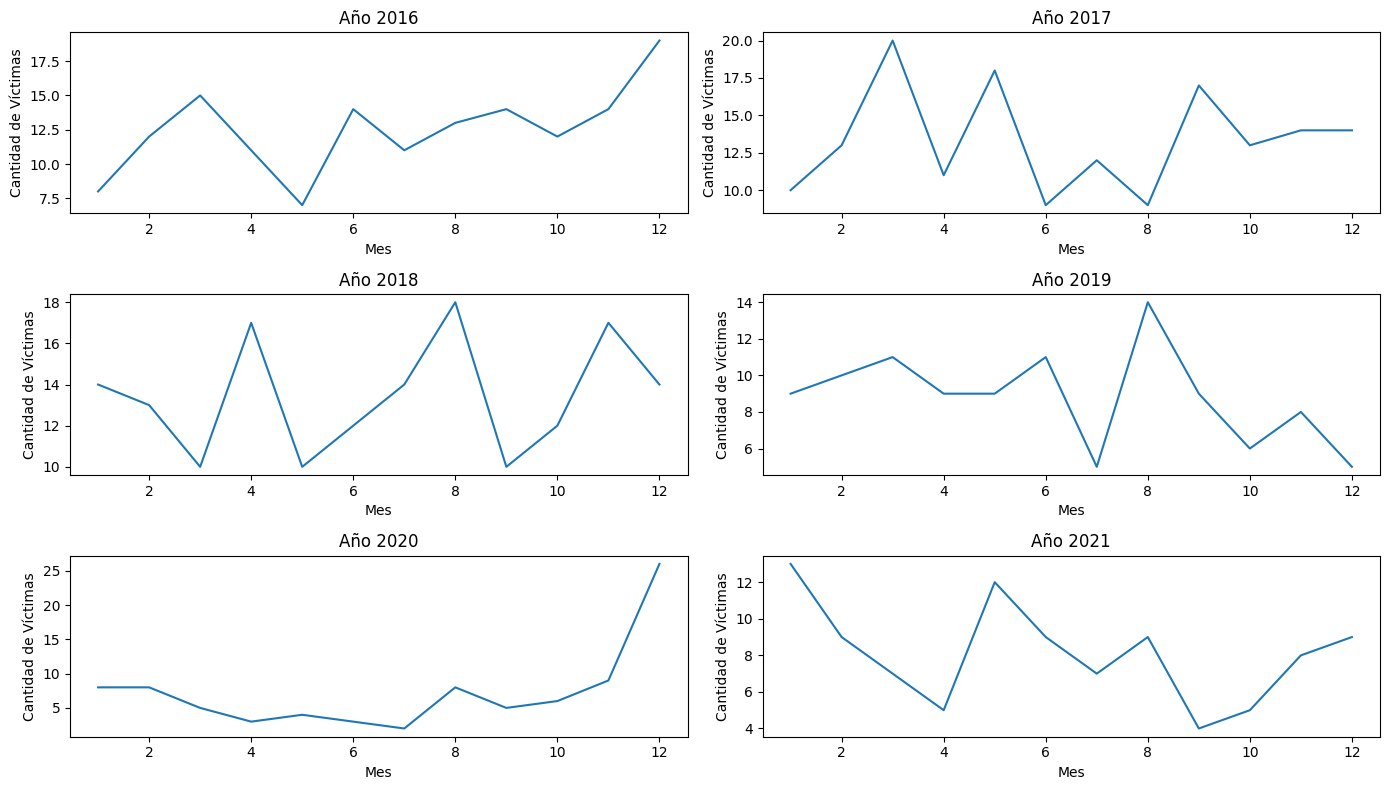

In [65]:
functions.accidentes_mensuales(df_homicidios)

En los gráficos en general, no se ve ningún patrón respecto a la cantidad de casos de un año respecto de otro en un mismo mes. Lo que si se puede ver claramente, es la disminución de casos que hubo desde **Noviembre de 2019** hasta **Octubre de 2020**. Esto se debe a las restricciones impuestas por la cuarentena debido a la pandemia de COVID-19.

### Cantidad de casos por cada mes.

En este apartado, analizamos los registros de casos que se presentan en cada mes.

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 87 víctimas


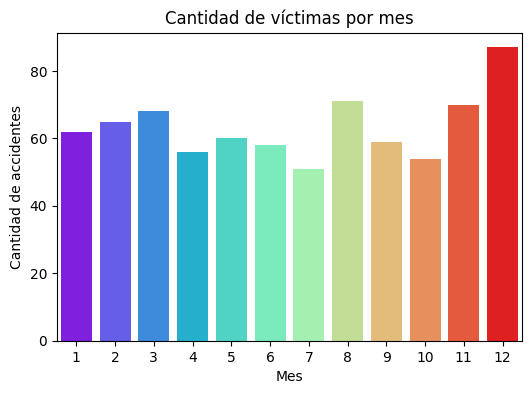

In [73]:
functions.cantidad_de_victimas_por_mes(df_homicidios)

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. El mes con menos cantidad de accidentes fatales registrados es Julio y Septiembre.

### Cantidad de casos por momento de la semana(Día de semana y fin de semana).

Lo que se busca en este punto es comparar la cantidad de accidentes en los días de semana (es decir, de lunes a viernes) y los fines de semana (sábado y domingo).

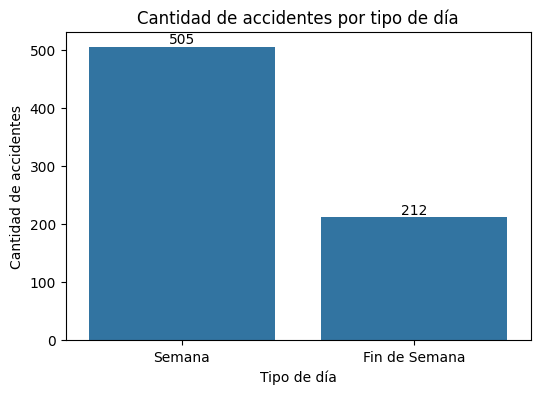

In [74]:
functions.cantidad_accidentes_semana_fin_de_semana(df_homicidios)

En esta gráfica podemos observar que la mayor cantidad de accidentes fue durante la semana y que los accidentes registrados los fines de semana representan menos de la mitad. Tengamos en cuenta que esto sucede debido a la acumulación que representan los días de semana(5 días), respecto al fin de semana(2 días). Se podría realizar un estudio de cada día para verificar con más detalle.

### Cantidad de casos por momento del día.

Para este análisis se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

* **Mañana**: de 6:00 a 10:59
* **Medio día**: de 11:00 a 13:59
* **Tarde**: de 14:00 a 18:59
* **Noche**: de 19:00 a 23:59
* **Madrugada**: de 24:00 a 05:59

A continuación, se observa la distribución de la cantidad de accidentes en cada una de estas categorías.

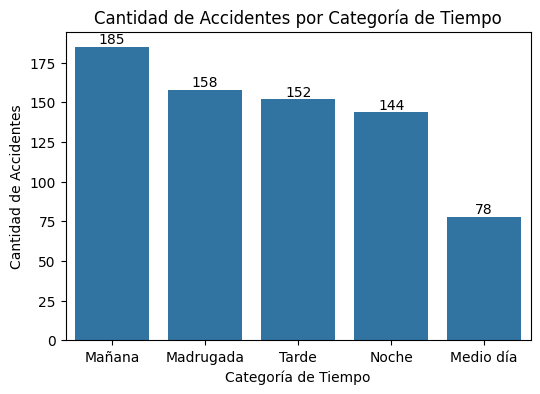

In [80]:
functions.cantidad_accidentes_por_categoria_tiempo(df_homicidios)

Se puede apreciar que la gran mayoría de los accidentes ocurren durante la **mañana(aproximadamente un 26%)**, donde la actividad laboral es alta.<br>
En el **mediodía** se registra una cantidad considerablemente menor de accidentes fatales **(aproximadamente un 11%)**, respecto a los otros momentos del día.

### Cantidad de víctimas por edades

En este apartado se analizan las cantidades de datos por edades, las cuales para un mejor análisis fueron divididas en los siguientes rangos etarios:
- **Infantes:** edades menores a 15 años.
- **Jóvenes:** edades entre 16 y 25 años.
- **Adultos:** edades entre 26 y 50 años.
- **Adultos mayores:** edades entre 51 y 70 años.
- **Ancianos:** edades mayores a 71 años.

<Axes: xlabel='Rango etario', ylabel='Cantidad de registros'>

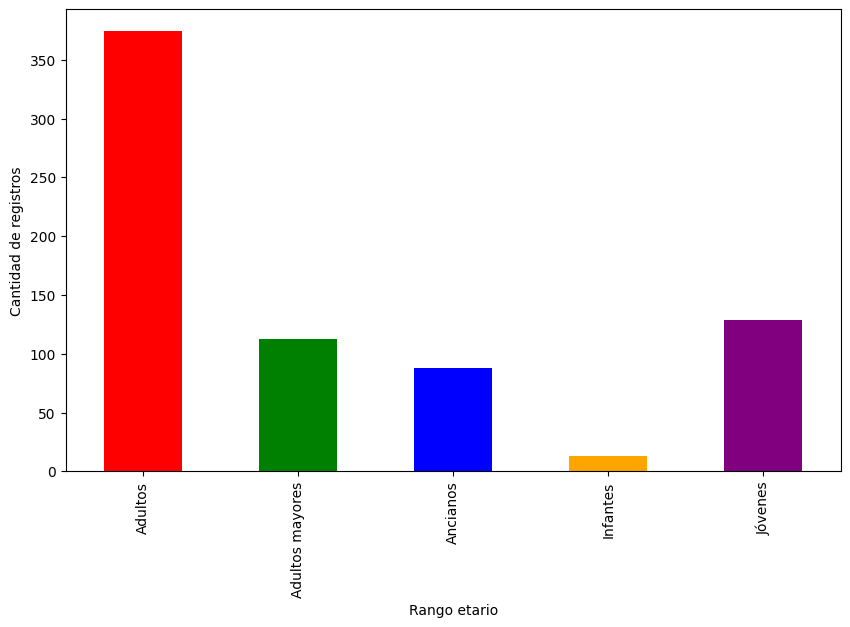

In [86]:
functions.victimas_por_rango_etario(df_homicidios)

En el gráfico anterior podemos visualizar que la categoría **Adultos** contiene la gran mayoría de los casos de accidentes

### Cantidad de víctimas según Sexo.

En este apartado se intenta analizar la relación del sexo con las cantidades de accidentes, los roles y el tipo de vehículo que ocupaba o si era peatón.

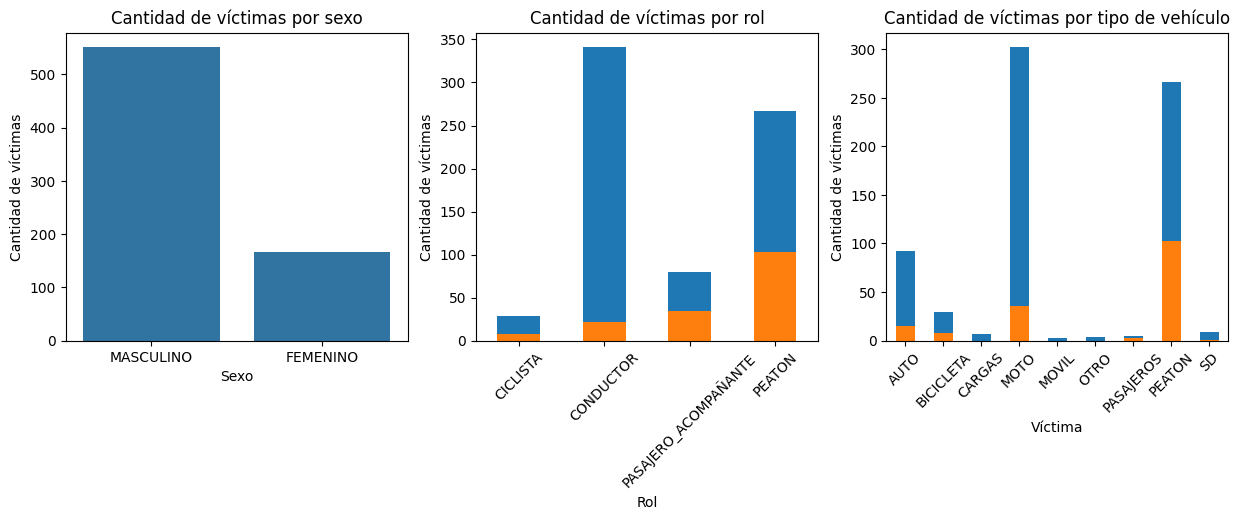

In [95]:
functions.cantidad_victimas_sexo_rol_victima(df_homicidios)

Se puede ver la diferencia en la cantidad de víctimas **masculinas(color azul)** por sobre las **femeninas(color durazno)**. Se aprecia la diferencia sobre todo en Conductor, donde la mayor proporción son masculinos y lo que llama la atención es que Motos es el vehículo con mayor proporción de accidentes con una alta proporción de masculinos. Los peatones también son las víctimas con mayor cantidad de fallecimientos en accidentes, con mayor proporción de masculinos, pero menos pronunciada la diferencia.

### Tipos de calle 

En este apartado, vamos a analizar los tipos de calles donde ocurren los casos y así encontrar patrones.

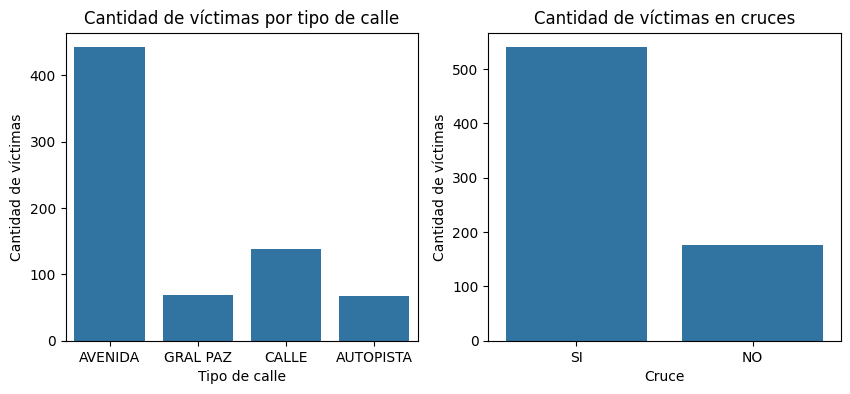

In [101]:
functions.accidentes_tipo_de_calle(df_homicidios)

Se pueden ver que la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.

### Cantidad de acusados 

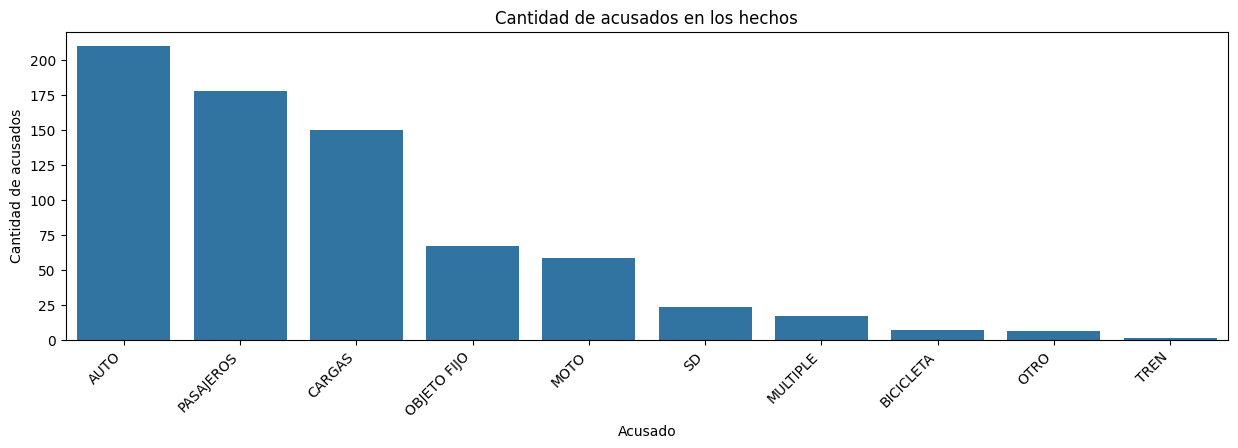

Resumen de acusados:
       Acusado  Cantidad de acusados  Porcentaje de acusados
0         AUTO                   210                   29.29
1    PASAJEROS                   178                   24.83
2       CARGAS                   150                   20.92
3  OBJETO FIJO                    67                    9.34
4         MOTO                    58                    8.09
5           SD                    23                    3.21
6     MULTIPLE                    17                    2.37
7    BICICLETA                     7                    0.98
8         OTRO                     6                    0.84
9         TREN                     1                    0.14


In [103]:
functions.cantidad_acusados(df_homicidios)

Lo que se interpreta de este gráfico es que la mayor responsabilidad en los hechos registrados es de los conductores de **autos**, seguidas de **pasajeros** y **cargas (éste último se refiere a vehículos de carga)**. En cuanto a **Pasajeros**, se debe estar refiriendo a que el hecho ocurrido está asociado a una persona que subía, bajaba o se trasladaba por algún medio de transporte público, por lo cual tiene sentido ya que el vehículo involucrado sería el transporte público.

## Carga de datos

In [102]:
df_homicidios.to_csv('datos_homicidios_final.csv', index=False, encoding='utf-8')
print('Se guardaron correctamente los datos.')

Se guardaron correctamente los datos.
